# Exploratory Analysis of Absenteeism at Work Data
The purpose of this project is to conduct exploratory data analysis on the 'Absenteeism at work' data set, which was retrieved from <https://data.world/aaizemberg/absenteeismatwork/activity>.

A description of the data set is found at: <https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work#> and details the numeric code used within the columns of the data set. This information will be used to prepare the data for further analysis and will be referenced at various stages of exploratory analysis.

We will explore possible trends/patterns that may reveal insights about absenteeism.

### Questions to explore:
  * When is absenteeism most likely to occur?

  * Which demographic has the highest/lowest amount of absenteeism?

  * Are there additional factors that could contribute to absenteeism?
  
  * What are the main reasons for absenteeism at this workplace?

### This project consists of 2 stages:
  - Data Prepping & Processing
  
  - Exploring and Visualizing Trends in Absentee Data

## Data Prepping & Processing

In [1]:
#importing modules
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#read .tsv file into dataframe using tab as seperator
df=pd.read_csv('/Volumes/Volume D/Portfolio/Absentee_at_work_project/Absenteeism_at_work.tsv', sep='\t')

In [3]:
#printing first 5 rows of dataframe
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
#printing last 5 rows of dataframe
df.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,...,0,1,1,0,0,1,77,175,25,0


In [5]:
# Displays all columns without truncating
pd.set_option('display.max_columns', None)
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [6]:
#describing dataframe and shape to contextualize the data
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [7]:
df.shape

(740, 21)

#### Observations from describing dataframe for further investigation
  * The minimum value of **'Reason for absence'** is 0. Zero is not defined in the data description as a reason for absence.

  * The minimum value of **'Month of absence'** is 0. This means there is no Month information given for these rows.
  
  * The minimum value of **'Absenteeism time in hours'** is 0. This may lead to some issues later when trying to discover trends based on the number of absentee hours.

In [8]:
#Finding value count for 'Absenteeism time in hours' column
df['Absenteeism time in hours'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
5        7
40       7
32       6
64       3
80       3
120      3
56       2
112      2
7        1
104      1
48       1
Name: Absenteeism time in hours, dtype: int64

We see that there are 44 counts of 0 hours in the absentee data. Let's try and find a way to make sense of all these reported 0 hours.

In [9]:
#Slicing dataframe to show only rows where absenteeism time in hours = 0
zero_hours = df.loc[(df['Absenteeism time in hours'] == 0)]
zero_hours

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
50,20,0,9,2,4,260,50,11,36,241.476,92,1,1,4,1,0,0,65,168,23,0
51,29,0,9,2,4,225,26,9,28,241.476,92,1,1,1,0,0,2,69,169,24,0
54,11,0,9,3,4,289,36,13,33,241.476,92,1,1,2,1,0,1,90,172,30,0
55,36,0,9,3,4,118,13,18,50,241.476,92,1,1,1,1,0,0,98,178,31,0
58,13,0,9,4,4,369,17,12,31,241.476,92,1,1,3,1,0,0,70,169,25,0
64,36,0,10,4,4,118,13,18,50,253.465,93,1,1,1,1,0,0,98,178,31,0
134,34,27,1,2,2,118,10,10,37,308.593,95,0,1,0,0,0,0,83,172,28,0
203,2,0,4,2,3,235,29,12,48,326.452,96,1,1,1,0,1,5,88,163,33,0
213,7,0,5,4,3,279,5,14,39,378.884,92,1,1,2,1,1,0,68,168,24,0


Slicing the dataframe for only incidents with zero hours, we can see that the 'Reason for absence' for nearly all rows is 0. As 0 is not listed as a reason for absence, we will assume that the reason is either not available or missing data. Additionally, nearly all counts of absence are marked for "Disciplinary failure." 

While this may tell us why these rows were input into the absentee data, it will only skew our findings when looking at trends for absentee time. We will remove these data points for this particular analysis.

In [10]:
#dropping rows where absenteeism time in hours = 0
df.drop(df.loc[df['Absenteeism time in hours']==0].index, inplace=True)

#checking our value counts to assure that all 0's have been removed from the data
df['Absenteeism time in hours'].value_counts()

8      208
2      157
3      112
1       88
4       60
16      19
24      16
5        7
40       7
32       6
64       3
80       3
120      3
56       2
112      2
7        1
104      1
48       1
Name: Absenteeism time in hours, dtype: int64

Let's check to see if there are any additional 0s in the 'Reason for absence' column

In [11]:
df['Reason for absence'].value_counts()

23    149
28    112
27     68
13     55
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64

In [12]:
df['Month of absence'].value_counts()

3     83
2     72
7     65
10    62
5     58
11    57
8     54
4     52
6     51
12    49
1     49
9     44
Name: Month of absence, dtype: int64

Using value_counts function, we're able to verify that all zeros have been successfully removed from all 3 columns. 

### Codebook
Season 
| Code | Season|
| :- | :- |
| 1 | Summer |
| 2 | Autumn |
| 3 | Winter |
| 4 | Spring |

Day of the Week
|Code | Day |
| :- | :- |
| 2 | Monday |
| 3 | Tuesday |
| 4 | Wednesday |
| 5 | Thursday |
| 6 | Friday |

Education
|Code | Level |
| :- | :- |
| 1 | High School |
| 2 | Graduate |
| 3 | Postgraduate |
| 4 | Master & Doctor |

Disciplinary failure, Social drinker, Social smoker
| Code | Meaning |
| :- | :- |
| 0 | No |
| 1 | Yes |

Reason for Absence (ICD)
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

1 Certain infectious and parasitic diseases

2 Neoplasms

3 Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism

4 Endocrine, nutritional and metabolic diseases

5 Mental and behavioural disorders

6 Diseases of the nervous system

7 Diseases of the eye and adnexa

8 Diseases of the ear and mastoid process

9 Diseases of the circulatory system

10 Diseases of the respiratory system

11 Diseases of the digestive system

12 Diseases of the skin and subcutaneous tissue

13 Diseases of the musculoskeletal system and connective tissue

14 Diseases of the genitourinary system

15 Pregnancy, childbirth and the puerperium

16 Certain conditions originating in the perinatal period

17 Congenital malformations, deformations and chromosomal abnormalities

18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified

19 Injury, poisoning and certain other consequences of external causes

20 External causes of morbidity and mortality

21 Factors influencing health status and contact with health services

And 7 categories without (CID) 

22 patient follow-up

23 medical consultation

24 blood donation

25 laboratory examination

26 unjustified absence

27 physiotherapy

28 dental consultation

In [13]:
# Rename columns for clarity and efficiency
df.rename(columns = {'Son': 'Children', 'Month of absence':'Month','Distance from Residence to Work':'Distance to work','Absenteeism time in hours':'Absentee hours'}, inplace = True)
df.head()

,ID,Reason for absence,Month,Day of the week,Seasons,Transportation expense,Distance to work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Children,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absentee hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2


In [14]:
df.rename(columns = {df.columns[9]:'Work load per day'}, inplace= True)
df.head()

,ID,Reason for absence,Month,Day of the week,Seasons,Transportation expense,Distance to work,Service time,Age,Work load per day,Hit target,Disciplinary failure,Education,Children,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absentee hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2


## Exploring & Visualizing Trends in Absentee Data

### Analysis by Absentee Events

In [15]:
#find correlation among columns in dataframe
df.corr()

,ID,Reason for absence,Month,Day of the week,Seasons,Transportation expense,Distance to work,Service time,Age,Work load per day,Hit target,Disciplinary failure,Education,Children,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absentee hours
ID,1.000000,-0.082239,0.001350,0.037993,0.098344,-0.218650,-0.513676,-0.293064,0.025402,0.106659,0.007767,NaN,-0.031055,0.010626,-0.469789,0.002811,-0.022132,-0.261251,0.046235,-0.303154,-0.017577
Reason for absence,-0.082239,1.000000,-0.051632,0.139780,-0.049309,-0.082326,0.166834,0.063563,-0.012952,-0.135910,0.011565,NaN,-0.102716,-0.015184,0.121221,-0.071135,-0.029914,0.061504,-0.106396,0.116443,-0.300813
Month,0.001350,-0.051632,1.000000,-0.004435,0.396522,0.130296,-0.005061,-0.060860,0.003033,-0.173712,-0.458745,NaN,-0.059851,0.071349,0.042514,-0.049586,0.074547,0.019309,-0.069368,0.047585,0.033875
Day of the week,0.037993,0.139780,-0.004435,1.000000,0.049012,0.035570,0.118194,0.006891,-0.012138,0.018928,0.035371,NaN,0.059631,0.103492,0.038277,0.026839,-0.014858,-0.150461,-0.085867,-0.125316,-0.130839
Seasons,0.098344,-0.049309,0.396522,0.049012,1.000000,0.018140,-0.055463,-0.006818,-0.026869,0.164882,-0.047721,NaN,0.005660,0.039101,-0.050597,-0.080228,0.021174,-0.035183,-0.038188,-0.017491,0.012429
Transportation expense,-0.218650,-0.082326,0.130296,0.035570,0.018140,1.000000,0.265104,-0.341838,-0.217854,-0.024080,-0.076930,NaN,-0.058251,0.386831,0.174328,0.007725,0.431546,-0.186877,-0.197222,-0.114765,0.040808
Distance to work,-0.513676,0.166834,-0.005061,0.118194,-0.055463,0.265104,1.000000,0.143673,-0.134035,-0.066845,-0.015486,NaN,-0.265459,0.039428,0.485190,-0.089702,0.207687,-0.017745,-0.361312,0.153649,-0.099886
Service time,-0.293064,0.063563,-0.060860,0.006891,-0.006818,-0.341838,0.143673,1.000000,0.677288,0.018731,-0.012775,NaN,-0.210558,-0.053415,0.346365,0.091961,-0.469122,0.461148,-0.049184,0.509803,0.019654
Age,0.025402,-0.012952,0.003033,-0.012138,-0.026869,-0.217854,-0.134035,0.677288,1.000000,-0.042212,-0.029013,NaN,-0.215207,0.061813,0.214618,0.128160,-0.264427,0.405219,-0.064140,0.463033,0.086038
Work load per day,0.106659,-0.135910,-0.173712,0.018928,0.164882,-0.024080,-0.066845,0.018731,-0.042212,1.000000,-0.075656,NaN,-0.078196,0.038374,-0.016247,-0.001562,-0.003880,-0.033746,0.107193,-0.090242,0.030206


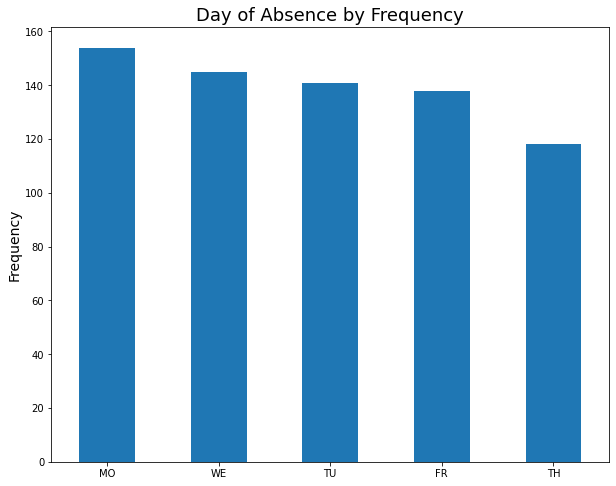

In [16]:
ax = df['Day of the week'].value_counts().plot(kind='bar',
    figsize=(10,8))
ax.tick_params(axis='x', labelrotation = 0)
ax.set_title("Day of Absence by Frequency", fontsize = 18)
ax.set_ylabel("Frequency", fontsize = 14)
labels = ["MO", "WE", "TU", "FR", "TH"]
ax.set_xticklabels(labels)
plt.show()

In [17]:
age_sorted = df.sort_values(['Age'], ascending = True)
age_sorted = age_sorted['Age']
age_sorted

40     27
118    27
209    27
269    27
132    27
       ..
729    58
521    58
434    58
620    58
640    58
Name: Age, Length: 696, dtype: int64

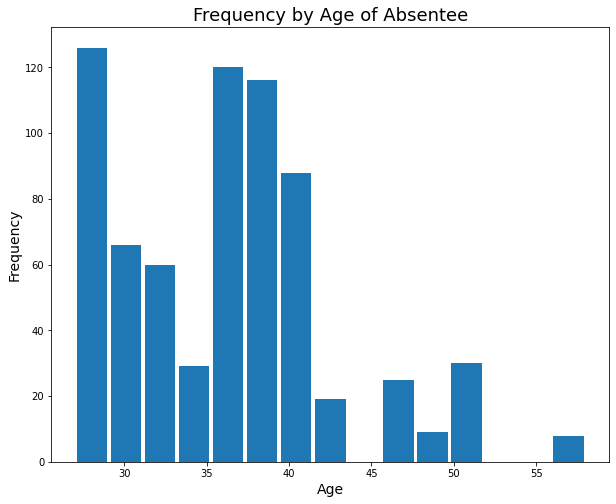

In [18]:
ax = df['Age'].plot(kind='hist',
    figsize=(10,8), bins = 15, rwidth = 0.9)
ax.tick_params(axis='x', labelrotation = 0)
ax.set_title("Frequency by Age of Absentee", fontsize = 18)
ax.set_xlabel("Age", fontsize = 14)
ax.set_ylabel("Frequency", fontsize = 14)
plt.show()

In [19]:
#remove duplicate data so df only contains one row with age of each employee
ID_agecount = df[['ID','Age']].drop_duplicates()
ID_agecount

,ID,Age
0,11,33
2,3,38
3,7,39
6,10,28
7,20,36
8,14,34
9,1,37
15,24,41
18,6,33
19,33,47


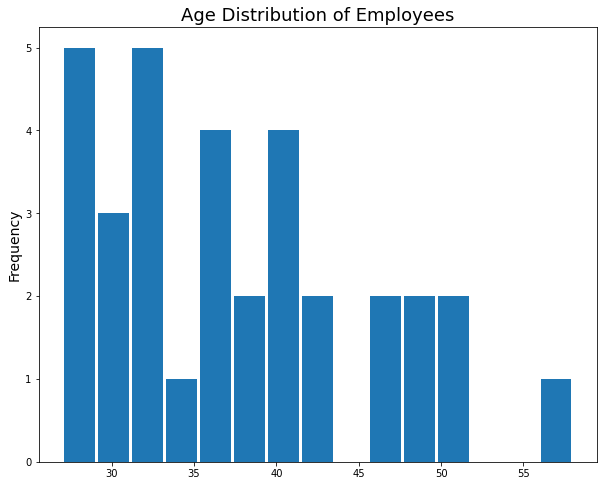

In [20]:
ax = ID_agecount['Age'].plot(kind='hist',
    figsize=(10,8), bins = 15, rwidth = 0.9)
ax.tick_params(axis='x', labelrotation = 0)
ax.set_title("Age Distribution of Employees", fontsize = 18)
ax.set_ylabel("Frequency", fontsize = 14)
plt.show()

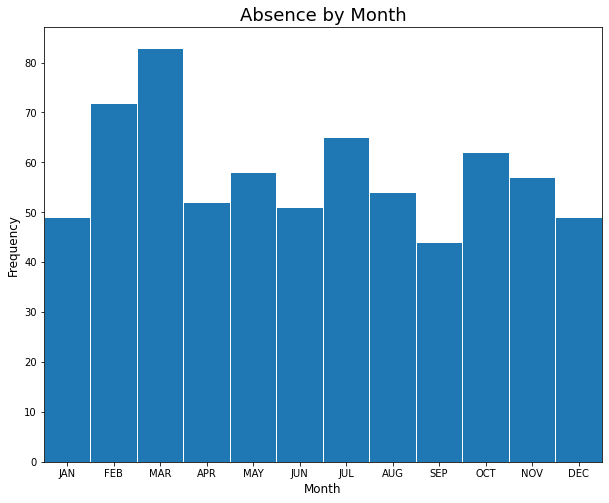

In [21]:
months = df['Month']
min_val = months.min()
max_val = months.max()
val_width = max_val - min_val
n_bins = 12
bin_width = val_width/n_bins
labels = ['','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','']
ax = df['Month'].plot(kind='hist',
    figsize=(10,8), bins = 12, edgecolor = "white")
ax.tick_params(axis='x', labelrotation = 0, )
ax.set_xticks(np.arange(min_val-bin_width/2, max_val+bin_width/2, bin_width))
ax.set_xticklabels(labels)
ax.set_xlim(1, 12)
ax.set_title("Absence by Month", fontsize = 18)
ax.set_ylabel("Frequency", fontsize = 12)
ax.set_xlabel("Month", fontsize = 12)
plt.show()

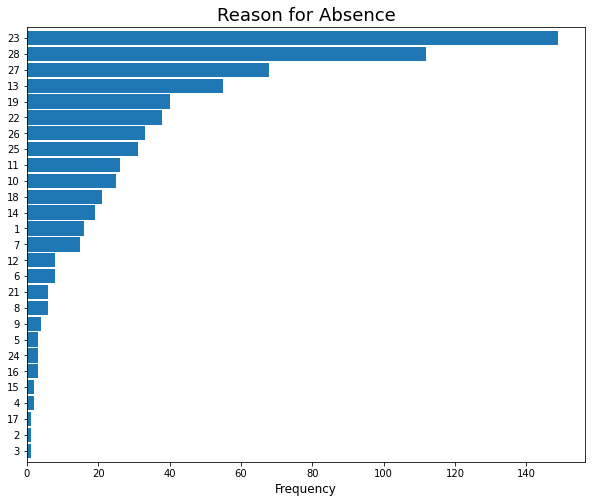

In [22]:
ax = df['Reason for absence'].value_counts(ascending=True).plot(kind='barh',
    figsize=(10,8),width=0.9 )
ax.tick_params(axis='x', labelrotation = 0)
ax.set_title('Reason for Absence', fontsize = 18)
ax.set_xlabel('Frequency', fontsize = 12)
plt.show()

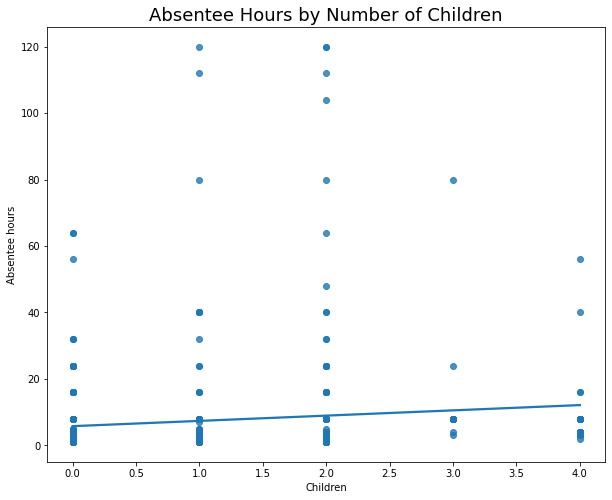

In [23]:
plt.figure(figsize = (10,8))
r = sns.regplot(x='Children', y = "Absentee hours", data = df, order=1, ci=None)
r.set_title('Absentee Hours by Number of Children', fontsize=18)
plt.show()

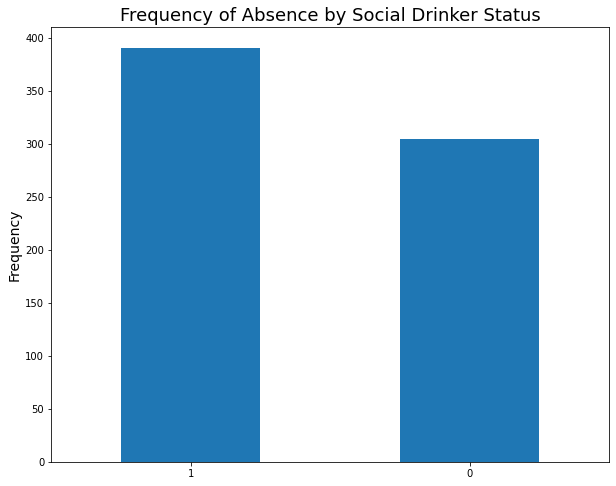

In [24]:
ax = df['Social drinker'].value_counts().plot(kind='bar',
    figsize=(10,8))
ax.tick_params(axis='x', labelrotation = 0)
ax.set_title("Frequency of Absence by Social Drinker Status", fontsize = 18)
ax.set_ylabel("Frequency", fontsize = 14)
plt.show()

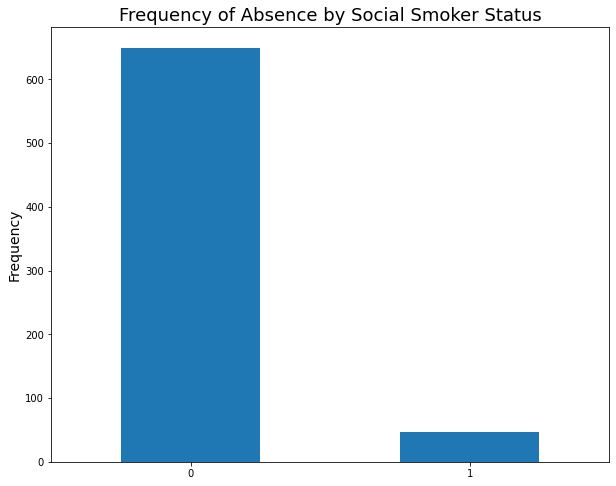

In [25]:
ax = df['Social smoker'].value_counts().plot(kind='bar',
    figsize=(10,8))
ax.tick_params(axis='x', labelrotation = 0)
ax.set_title("Frequency of Absence by Social Smoker Status", fontsize = 18)
ax.set_ylabel("Frequency", fontsize = 14)
plt.show()

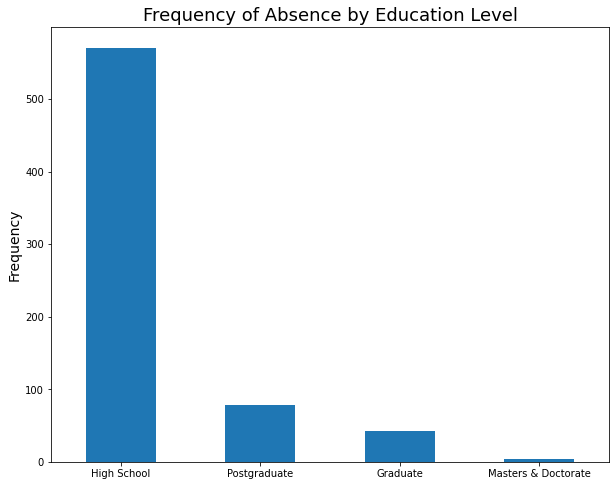

In [26]:
ax = df['Education'].value_counts().plot(kind='bar',
    figsize=(10,8))
ax.tick_params(axis='x', labelrotation = 0)
ax.set_title("Frequency of Absence by Education Level", fontsize = 18)
ax.set_ylabel("Frequency", fontsize = 14)
labels = ['High School','Postgraduate','Graduate','Masters & Doctorate']
ax.set_xticklabels(labels)
plt.show()

NOTE: In this study, the number of employees with a High School level education is significantly higher than any other education level. Looking at the following graph, we can explain why the frequency of absences in the previous graph is mainly due to High School level employees.

In [27]:
ID_edu = df[['ID','Education']].drop_duplicates()
ID_edu


,ID,Education
0,11,1
2,3,1
3,7,1
6,10,1
7,20,1
8,14,1
9,1,3
15,24,1
18,6,1
19,33,1


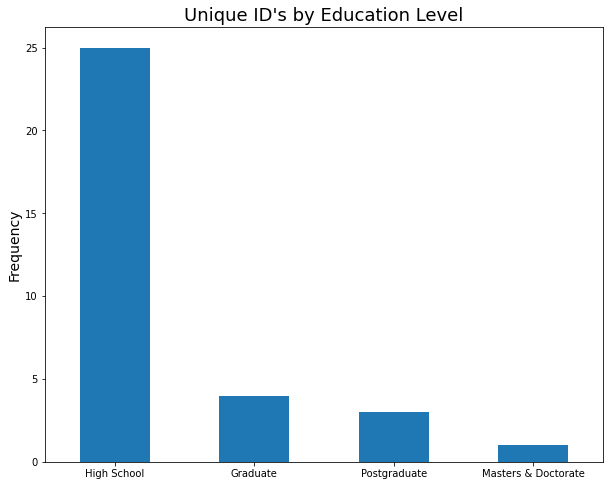

In [28]:
ax = ID_edu['Education'].value_counts().plot(kind='bar',
    figsize=(10,8))
ax.tick_params(axis='x', labelrotation = 0)
ax.set_title("Unique ID's by Education Level", fontsize = 18)
ax.set_ylabel("Frequency", fontsize = 14)
labels = ['High School', 'Graduate', 'Postgraduate', 'Masters & Doctorate']
ax.set_xticklabels(labels)
plt.show()

### Summary
These graphs provide the following insights:

  * 'Day of Absence by Frequency' - The most frequently missed day of work is __Monday__. The least frequently missed day of work is __Thursday__.

  * 'Frequency by Age of Absentee' X 'Age Distribution of Employees - While a significant proportion of employees at the company is in their __late 20's__ to __early 30's__, employees in their __late 20's__ were absent from work the __most__. Employees in their __early 30s__ had __far fewer__ absences in relation to their age distribution.

  * 'Reason for Absence' - The most common reason for absence was __Medical Consultation (23)__, followed by __Dental Consultation (28)__.

  * 'Absentee Hours by Number of Children' - The linear regression plot reveals a slight __positive__ relationship between the __number of children__ and the number of __absentee hours__. NOTE: The presence of some high outliers may affect the linear regression.

  * 'Frequency of Absence by Social Drinker Status' - __Social drinkers__ were __absent__ from work __more frequently__ than their non-drinking conuterparts.

  * 'Frequency of Absence by Social Smoker Status' - __Social smokers__ were absent from work __significantly less__ than their non-smoking counterparts.

  * 'Frequency of Absence by Education Level' - Employees with a __High School education__ were __absent__ far __more frequently__ than employees at any other education level; however, this does reflect the distribution of education level at this company.

# Analysis by Absenteeism Time in Hours

It is important in this particular analysis to consider the number of employees from which this data is being collected.

In [29]:
IDs = df[['ID']].nunique()
print("Number of unique" ,IDs)

Number of unique ID    33
dtype: int64


While there are 696 entries for absenteeism, there are only 33 employees from which this data was collected. Rather than treating each individual entry as a unique instance, we will now look at compositing the data for each employee to conduct further analysis.

In [30]:
#create new dataframe for composit data on each unique employee ID
df2 = df[['ID']].value_counts().reset_index()
df2.columns = ['ID', 'Incidents']
df2

,ID,Incidents
0,3,112
1,28,75
2,34,54
3,22,46
4,20,39
5,11,38
6,15,35
7,24,29
8,14,29
9,36,28


### Table Join

In [31]:
#create dataframe for traits/descriptors related to each unique employee
df_info1 = df[['ID','Age','Distance to work','Transportation expense','Education','Social drinker','Social smoker','Body mass index','Children','Pet']]

#drop duplicate rows
df_info1 = df_info1.drop_duplicates().reset_index()

#print new dataframe
df_info1

,index,ID,Age,Distance to work,Transportation expense,Education,Social drinker,Social smoker,Body mass index,Children,Pet
0,0,11,33,36,289,1,1,0,30,2,1
1,2,3,38,51,179,1,1,0,31,0,0
2,3,7,39,5,279,1,1,1,24,2,0
3,6,10,28,52,361,1,1,0,27,1,4
4,7,20,36,50,260,1,1,0,23,4,0
5,8,14,34,12,155,1,1,0,25,2,0
6,9,1,37,11,235,3,0,0,29,1,1
7,15,24,41,25,246,1,1,0,23,0,0
8,18,6,33,29,189,1,0,0,25,2,2
9,19,33,47,25,248,1,0,0,32,2,1


In [32]:
#drop first column
df_info1.drop(columns=df_info1.columns[0], axis = 1, inplace = True)
df_info1

,ID,Age,Distance to work,Transportation expense,Education,Social drinker,Social smoker,Body mass index,Children,Pet
0,11,33,36,289,1,1,0,30,2,1
1,3,38,51,179,1,1,0,31,0,0
2,7,39,5,279,1,1,1,24,2,0
3,10,28,52,361,1,1,0,27,1,4
4,20,36,50,260,1,1,0,23,4,0
5,14,34,12,155,1,1,0,25,2,0
6,1,37,11,235,3,0,0,29,1,1
7,24,41,25,246,1,1,0,23,0,0
8,6,33,29,189,1,0,0,25,2,2
9,33,47,25,248,1,0,0,32,2,1


In [33]:
#merge df_info1 to df2 using the ID column as a key for both dataframes
df2 = df_info1.join(df2.set_index('ID'), on='ID')
df2

,ID,Age,Distance to work,Transportation expense,Education,Social drinker,Social smoker,Body mass index,Children,Pet,Incidents
0,11,33,36,289,1,1,0,30,2,1,38
1,3,38,51,179,1,1,0,31,0,0,112
2,7,39,5,279,1,1,1,24,2,0,4
3,10,28,52,361,1,1,0,27,1,4,24
4,20,36,50,260,1,1,0,23,4,0,39
5,14,34,12,155,1,1,0,25,2,0,29
6,1,37,11,235,3,0,0,29,1,1,22
7,24,41,25,246,1,1,0,23,0,0,29
8,6,33,29,189,1,0,0,25,2,2,8
9,33,47,25,248,1,0,0,32,2,1,23


In [34]:
df_abs_time = df[['ID','Absentee hours']]
df_abs_time

,ID,Absentee hours
0,11,4
2,3,2
3,7,4
4,11,2
5,3,2
...,...,...
732,10,8
733,28,8
734,13,80
735,11,8


In [35]:
#sum total number of absentee hours, grouped by ID
df_abs_time = df_abs_time.groupby(['ID'])['Absentee hours'].sum().reset_index()
df_abs_time

,ID,Absentee hours
0,1,121
1,2,25
2,3,482
3,5,104
4,6,72
5,7,30
6,9,262
7,10,186
8,11,450
9,12,34


In [36]:
df2 = df_abs_time.join(df2.set_index('ID'), on='ID')
df2

,ID,Absentee hours,Age,Distance to work,Transportation expense,Education,Social drinker,Social smoker,Body mass index,Children,Pet,Incidents
0,1,121,37,11,235,3,0,0,29,1,1,22
1,2,25,48,29,235,1,0,1,33,1,5,4
2,3,482,38,51,179,1,1,0,31,0,0,112
3,5,104,43,20,235,1,1,0,38,1,0,14
4,6,72,33,29,189,1,0,0,25,2,2,8
5,7,30,39,5,279,1,1,1,24,2,0,4
6,9,262,58,14,228,1,0,0,22,2,1,8
7,10,186,28,52,361,1,1,0,27,1,4,24
8,11,450,33,36,289,1,1,0,30,2,1,38
9,12,34,31,51,233,2,1,0,21,1,8,7


In [37]:
#use corr function to look for any correlation between variables
df2.corr()

,ID,Absentee hours,Age,Distance to work,Transportation expense,Education,Social drinker,Social smoker,Body mass index,Children,Pet,Incidents
ID,1.000000,-0.119216,0.066649,-0.076501,-0.091752,0.027964,-0.175368,-0.076486,-0.120743,-0.245826,-0.226216,-0.068731
Absentee hours,-0.119216,1.000000,-0.075495,0.021578,-0.263523,-0.221427,0.243066,-0.372932,0.072151,0.141170,-0.228953,0.806932
Age,0.066649,-0.075495,1.000000,-0.265084,-0.069246,-0.195393,-0.062116,0.156239,0.412100,0.161661,-0.043029,-0.181777
Distance to work,-0.076501,0.021578,-0.265084,1.000000,0.255036,-0.265114,0.169057,-0.075920,-0.040989,-0.024932,0.467519,0.189428
Transportation expense,-0.091752,-0.263523,-0.069246,0.255036,1.000000,-0.093877,-0.018785,-0.055240,-0.041598,0.109209,0.220249,-0.284313
Education,0.027964,-0.221427,-0.195393,-0.265114,-0.093877,1.000000,-0.210695,-0.167857,-0.130211,-0.134576,0.048218,-0.104959
Social drinker,-0.175368,0.243066,-0.062116,0.169057,-0.018785,-0.210695,1.000000,0.058428,0.062511,0.288695,-0.034877,0.083728
Social smoker,-0.076486,-0.372932,0.156239,-0.075920,-0.055240,-0.167857,0.058428,1.000000,-0.165660,0.225182,0.106591,-0.320547
Body mass index,-0.120743,0.072151,0.412100,-0.040989,-0.041598,-0.130211,0.062511,-0.165660,1.000000,-0.052549,0.019548,0.123673
Children,-0.245826,0.141170,0.161661,-0.024932,0.109209,-0.134576,0.288695,0.225182,-0.052549,1.000000,0.093892,-0.104850


In [38]:
#find mean data by social drinker status
avg_drink = df2.groupby(['Social drinker']).mean()
avg_drink

,ID,Absentee hours,Age,Distance to work,Transportation expense,Education,Social smoker,Body mass index,Children,Pet,Incidents
Social drinker,,,,,,,,,,,
0,20.562500,118.625000,38.312500,24.312500,244.250000,1.562500,0.187500,25.687500,0.812500,1.125,19.0625
1,17.058824,189.764706,37.352941,29.176471,241.529412,1.235294,0.235294,26.235294,1.411765,1.000,23.0000


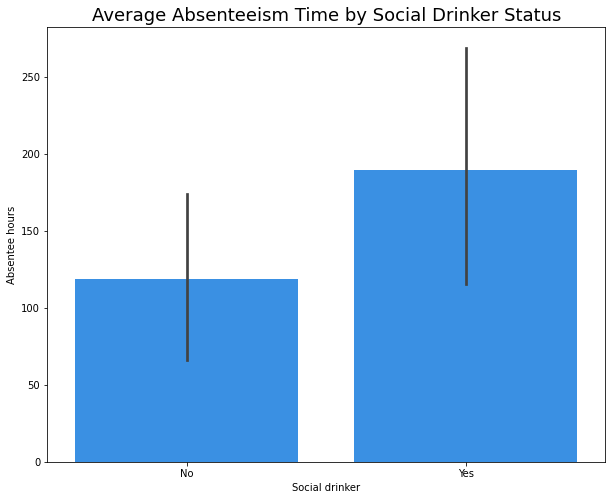

In [39]:
plt.figure(figsize = (10,8))
ax = sns.barplot(x = "Social drinker", y = "Absentee hours", data = df2, color = 'dodgerblue')
ax.set_title("Average Absenteeism Time by Social Drinker Status", fontsize = 18)
labels = ('No','Yes')
ax.set_xticklabels(labels)
plt.show()

In [40]:
#find mean data by social smoker status
avg_smoke = df2.groupby(['Social smoker']).mean()
avg_smoke

,ID,Absentee hours,Age,Distance to work,Transportation expense,Education,Social drinker,Body mass index,Children,Pet,Incidents
Social smoker,,,,,,,,,,,
0,19.153846,183.576923,37.192308,27.384615,244.923077,1.461538,0.500000,26.346154,1.000000,0.961538,25.000000
1,17.285714,50.142857,40.142857,24.714286,235.142857,1.142857,0.571429,24.571429,1.571429,1.428571,6.571429


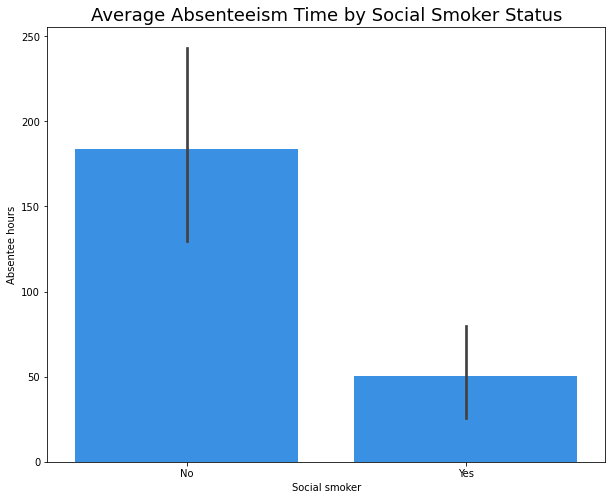

In [41]:
plt.figure(figsize = (10,8))
ax = sns.barplot(x = "Social smoker", y = "Absentee hours", data = df2, color = 'dodgerblue')
ax.set_title("Average Absenteeism Time by Social Smoker Status", fontsize = 18)
labels = ('No','Yes')
ax.set_xticklabels(labels)
plt.show()

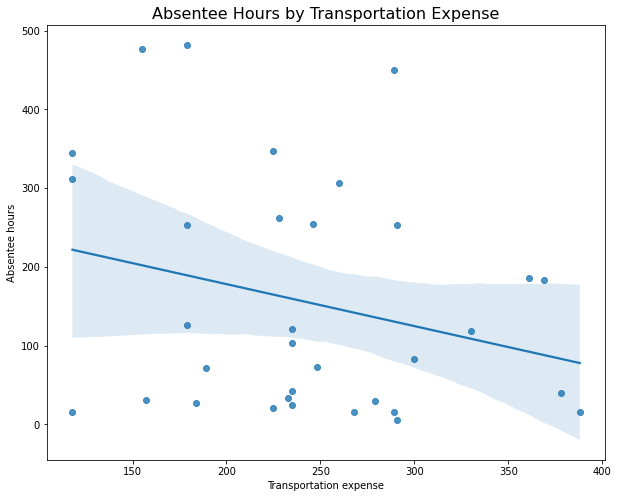

In [42]:
plt.figure(figsize = (10,8))
ax = sns.regplot(x='Transportation expense', y = "Absentee hours", data = df2, order=1)
ax.set_title('Absentee Hours by Transportation Expense', fontsize = 16)
plt.show()

In [43]:
import scipy
from scipy import stats

In [44]:
tab_transpo_expen_T = pd.crosstab(df2['Transportation expense'], df2['Absentee hours'])
tab_transpo_expen_I = pd.crosstab(df2['Transportation expense'], df2['Incidents'])
tab_transpo_expen_D = pd.crosstab(df2['Transportation expense'], df2['Distance to work'])

In [45]:
def results(chi_squared, p, dof, expected):
    print(f"Chi-Squared: {chi_squared}")
    print(f"P-value: {p}")
    print(f"Degrees of Freedom: {dof}") 

In [46]:
chi_squared, p, dof, expected = stats.chi2_contingency(tab_transpo_expen_T)
print("Results of Transportation expense X Absentee hours")
results(chi_squared, p, dof, expected)

Results of Transportation expense X Absentee hours
Chi-Squared: 642.1250000000001
P-value: 0.2257356533206613
Degrees of Freedom: 616


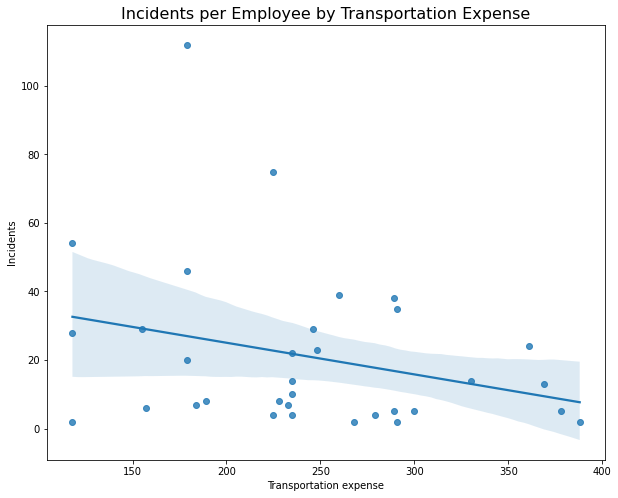

In [47]:
plt.figure(figsize = (10,8))
ax = sns.regplot(x='Transportation expense', y = "Incidents", data = df2, order=1)
ax.set_title('Incidents per Employee by Transportation Expense', fontsize = 16)
plt.show()

In [48]:
chi_squared, p, dof, expected = stats.chi2_contingency(tab_transpo_expen_I)
print("Results of Transportation expense X Incidents")
results(chi_squared, p, dof, expected)

Results of Transportation expense X Incidents
Chi-Squared: 442.7500000000001
P-value: 0.7324642879484798
Degrees of Freedom: 462


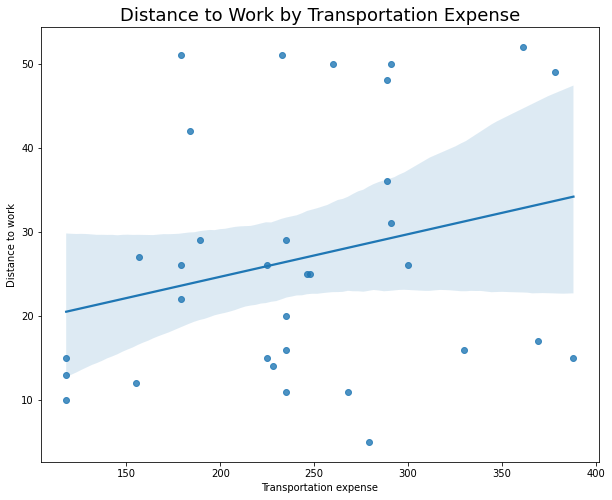

In [49]:
plt.figure(figsize = (10,8))
ax = sns.regplot(x='Transportation expense', y = "Distance to work", data = df2, order=1)
ax.set_title('Distance to Work by Transportation Expense', fontsize = 18)
plt.show()

In [50]:
chi_squared, p, dof, expected = stats.chi2_contingency(tab_transpo_expen_D)
print("Results of Transportation expense X Distance to work")
results(chi_squared, p, dof, expected)

Results of Transportation expense X Distance to work
Chi-Squared: 503.7083333333334
P-value: 0.25900747821449005
Degrees of Freedom: 484


We see that in all of these Chi-Squared tests, the p-value is not significant. Therefore, we are not able to state that transportation expense affects the number of incidents or number of absentee hours.

It is also important to note that the sample size for these analases are relatively small, which makes it less likely we would find any significant relation between variables.

### Summary

Grouping by unique ID, we were able to perform exploratory analysis using categorical values to describe each employee. Using this technique, we were able to discover new information while also verifying analyses from the previous section.

- __Social Drinker__ - On average, __social drinkers__ were absent __60% more__ hours than their non-drinking counterparts. This supports our findings from the previous section that showed that social drinkers were also absent from work far more frequently. 

- __Social Smoker__ - On average, __non-smokers__ were absent __366% more__ hours than their social smoker counterparts. This supports our findings from the previous section that showed that non-smokers were absent significantly more frequently than social smokers.

- __Transportation Expense__ - Data visualizations appear to show a weak positive relationship between transportation expense and distance to work. They also reveal weak negative relationships between transportation expense and number of incidents/number of absentee hours. However, our chi-squared tests showed no statistical significance between these variables.